# Open Data Hackathon - Klimanotstand Konstanz



In [111]:
import pandas as pd
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure

## Load in data



```Zeug zum Busverkehr :```

In [112]:

pathBusverkehr = r'../data/Busverkehr'
filesBusverkehr = Path(pathBusverkehr).glob('*.csv')

file_namesBusverkehr=[]
for i in filesBusverkehr:
    file_namesBusverkehr.append(i)

dfBusverkehr=pd.read_csv(file_namesBusverkehr[1],sep=";")
dfBusverkehr.LINIE.unique()

array([  1,  11,  12, 123, 134,  14,  15,   2,   3, 413,   5,   6,   9,
        93,   4])

---------------------------------------------------------------

```Zeug zur Umfrage:```

Importieren von Umfragedaten

In [113]:
dfUmfrage=pd.read_csv('../data/Open Data_Ergebnisse_Klimaschutzdaten_fuer_Konstanz.csv',sep=";")

print("spalten: ",dfUmfrage.columns)
print("spalten anzahl: ",len(dfUmfrage.columns))
dfUmfrage


spalten:  Index(['ID', 'KL1', 'KL2', 'KL3', 'KL3a', 'DB1', 'DB2', 'DB3*', 'DB4', 'DB5',
       'DB6', 'DB7*', 'DB8', 'KS1', 'KS2', 'KS3', 'DV1', 'DV2', 'Zsmarbeit',
       'Interesse', 'Position'],
      dtype='object')
spalten anzahl:  21


,ID,KL1,KL2,KL3,KL3a,DB1,DB2,DB3*,DB4,DB5,...,DB7*,DB8,KS1,KS2,KS3,DV1,DV2,Zsmarbeit,Interesse,Position
0,1,4.0,1.0,1.0,1.0,4.0,4.0,5.0,4.0,5.0,...,4.0,5.0,3.0,4.0,5.0,4.0,3.0,5.0,4.0,2.0
1,2,5.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,4.0,2.0
2,3,5.0,1.0,1.0,2.0,4.0,5.0,5.0,2.0,5.0,...,4.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,2.0
3,4,5.0,1.0,1.0,1.0,5.0,4.0,5.0,5.0,4.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0
4,5,4.0,1.0,1.0,1.0,3.0,3.0,4.0,3.0,4.0,...,4.0,5.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,1.0
5,6,4.0,2.0,1.0,1.0,5.0,5.0,5.0,4.0,5.0,...,3.0,5.0,5.0,5.0,3.0,4.0,3.0,4.0,5.0,2.0
6,7,5.0,1.0,1.0,1.0,4.0,3.0,5.0,4.0,4.0,...,5.0,5.0,2.0,5.0,5.0,5.0,4.0,4.0,4.0,2.0
7,8,5.0,1.0,1.0,1.0,3.0,3.0,4.0,3.0,4.0,...,4.0,4.0,3.0,4.0,4.0,4.0,3.0,5.0,4.0,2.0
8,9,4.0,1.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,...,3.0,5.0,3.0,4.0,5.0,4.0,4.0,5.0,4.0,1.0
9,10,4.0,2.0,2.0,NaN,3.0,5.0,3.0,3.0,4.0,...,4.0,3.0,3.0,4.0,4.0,4.0,1.0,4.0,4.0,2.0


Zeilen 47 und 48 rausschmeißen, weil sie nur NaN Werte bzw uninteressante Werte enthalten. Sonstige NaN Werte mit 0 ersetzen, damit wir sie auch darstellen können.

In [114]:
#dropping row 47 and 48 because there are only nan values and irrelevant
dfUmfrage=dfUmfrage[:-2].fillna(0)

dfUmfrage

,ID,KL1,KL2,KL3,KL3a,DB1,DB2,DB3*,DB4,DB5,...,DB7*,DB8,KS1,KS2,KS3,DV1,DV2,Zsmarbeit,Interesse,Position
0,1,4.0,1.0,1.0,1.0,4.0,4.0,5.0,4.0,5.0,...,4.0,5.0,3.0,4.0,5.0,4.0,3.0,5.0,4.0,2.0
1,2,5.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,4.0,2.0
2,3,5.0,1.0,1.0,2.0,4.0,5.0,5.0,2.0,5.0,...,4.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,2.0
3,4,5.0,1.0,1.0,1.0,5.0,4.0,5.0,5.0,4.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0
4,5,4.0,1.0,1.0,1.0,3.0,3.0,4.0,3.0,4.0,...,4.0,5.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,1.0
5,6,4.0,2.0,1.0,1.0,5.0,5.0,5.0,4.0,5.0,...,3.0,5.0,5.0,5.0,3.0,4.0,3.0,4.0,5.0,2.0
6,7,5.0,1.0,1.0,1.0,4.0,3.0,5.0,4.0,4.0,...,5.0,5.0,2.0,5.0,5.0,5.0,4.0,4.0,4.0,2.0
7,8,5.0,1.0,1.0,1.0,3.0,3.0,4.0,3.0,4.0,...,4.0,4.0,3.0,4.0,4.0,4.0,3.0,5.0,4.0,2.0
8,9,4.0,1.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,...,3.0,5.0,3.0,4.0,5.0,4.0,4.0,5.0,4.0,1.0
9,10,4.0,2.0,2.0,0.0,3.0,5.0,3.0,3.0,4.0,...,4.0,3.0,3.0,4.0,4.0,4.0,1.0,4.0,4.0,2.0


Plot tests:


Antworten zu KL1:  [4. 5. 3. 1.]
Antworten zu KL2:  [1. 2.]
Antworten zu KL3:  [1. 2. 3.]
Antworten zu KL2 gezählt:  1.0    25
2.0    22
Name: KL2, dtype: int64


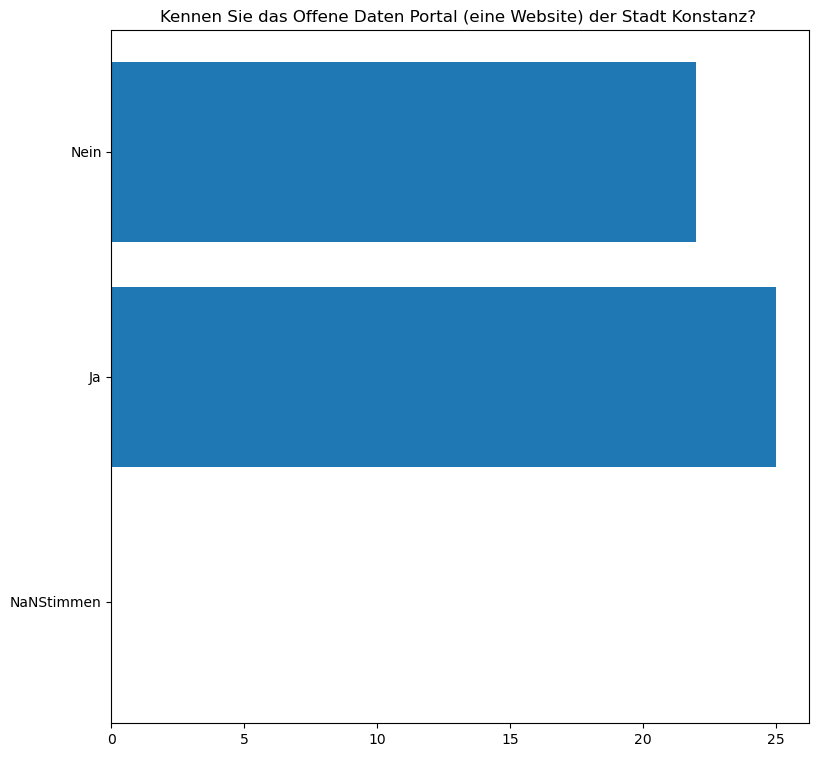

In [115]:
print("Antworten zu KL1: ",dfUmfrage.KL1.unique())
print("Antworten zu KL2: ",dfUmfrage.KL2.unique())
print("Antworten zu KL3: ",dfUmfrage.KL3.unique())

print("Antworten zu KL2 gezählt: ",dfUmfrage.KL2.value_counts())


antwortenGezählt=[0,dfUmfrage.KL2.value_counts()[1],dfUmfrage.KL2.value_counts()[2]]
antwortMöglichkeiten = ("NaNStimmen","Ja","Nein")


fig, ax = plt.subplots()

# Fig size
fig.set_size_inches(9,9)

plotTitel='Kennen Sie das Offene Daten Portal (eine Website) der Stadt Konstanz? '

ax.set_title(plotTitel)
ax.barh(y=antwortMöglichkeiten, width=antwortenGezählt)

# Show graphic
plt.show()

Funktion zur Auswertung und Plotten der einzelnen Fragen:

In [116]:
# df : ein panda.series von der spalte = Antworten auf eine Frage
# antwortMöglichkeiten : eine Liste von allen Antwortmöglichkeiten auf diese Frage
# titel : ein string mit der kompletten Frage

def plot(df,antwortMöglichkeiten,titel,dateiname):
    print("Das sind die Antworten gezählt : ",df.value_counts())
    
    print("Das sind alle möglichen Antworten: ",antwortMöglichkeiten)

    antwortenGezählt=[]
    #da die schleife bei 0 anfängt, muss das NaN value auf auf 0 gesetzt werden
    for i in range(len(antwortMöglichkeiten)):
        try:
            antwortenGezählt.append(df.value_counts()[i])
        except:
            antwortenGezählt.append(0)
    
    #nur zum Test (sollte eig nicht aufgerufen werden)
    if len(antwortenGezählt) != len(antwortMöglichkeiten):
        print("ERROR!!!")

    fig, ax = plt.subplots()
    fig.set_size_inches(9,9) # Fig size
    ax.set_title(titel,loc="center")
    ax.barh(y=antwortMöglichkeiten, width=antwortenGezählt)
    ax.set_xlabel("Anzahl Stimmen")
    ax.set_ylabel("Antwortmöglichkeiten")
    #plt.show()
    plt.savefig('./bilder/'+dateiname+'.png',bbox_inches='tight')

Anwendung der Funktion:

Das sind die Antworten gezählt :  5.0    28
4.0    14
3.0     4
1.0     1
Name: KL1, dtype: int64
Das sind alle möglichen Antworten:  ('NaNStimmen', 'nie', 'sehr selten', 'eher selten', 'manchmal', 'oft')
Das sind die Antworten gezählt :  1.0    25
2.0    22
Name: KL2, dtype: int64
Das sind alle möglichen Antworten:  ('NaNStimmen', 'ja', 'nein')
Das sind die Antworten gezählt :  1.0    39
2.0     5
3.0     3
Name: KL3, dtype: int64
Das sind alle möglichen Antworten:  ('NaNStimmen', 'Ja', 'Nein', 'Weiß ich nicht')
Das sind die Antworten gezählt :  1.0    24
2.0    16
0.0     7
Name: KL3a, dtype: int64
Das sind alle möglichen Antworten:  ('NaNStimmen', 'ja', 'nein')
Das sind die Antworten gezählt :  4.0    20
5.0    15
3.0    12
Name: DB1, dtype: int64
Das sind alle möglichen Antworten:  ('NaNStimmen', 'stimme überhaupt nicht zu', 'stimme nicht zu', 'teils-teils', 'stimme zu', 'stimme völlig zu')
Das sind die Antworten gezählt :  4.0    22
5.0    19
3.0     6
Name: DB2, dtype: int64
Das 

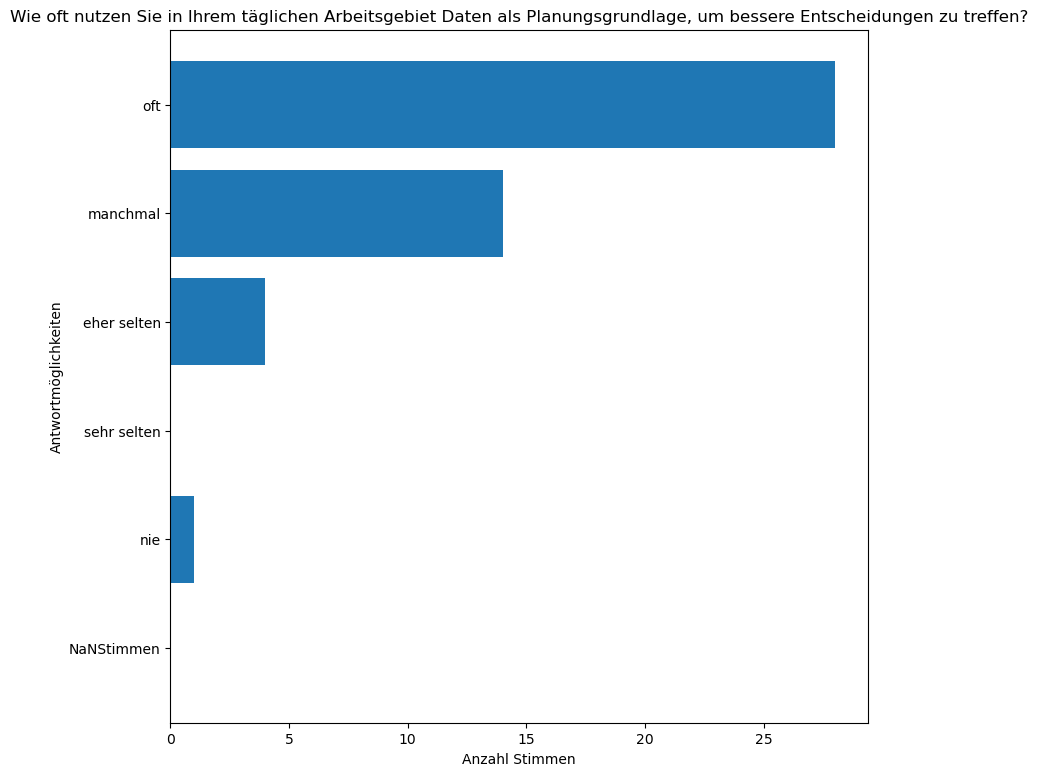

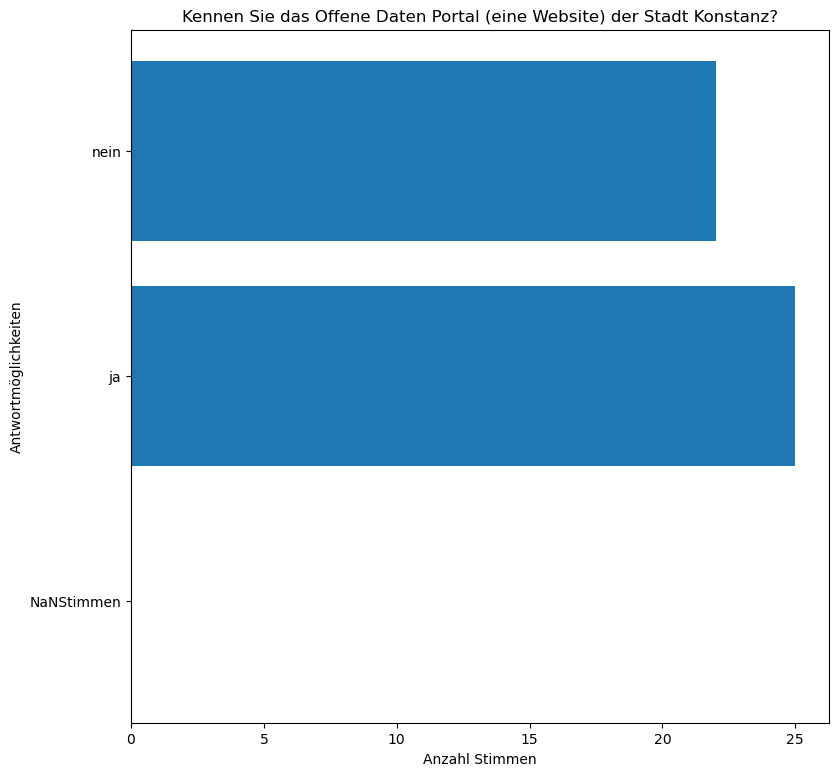

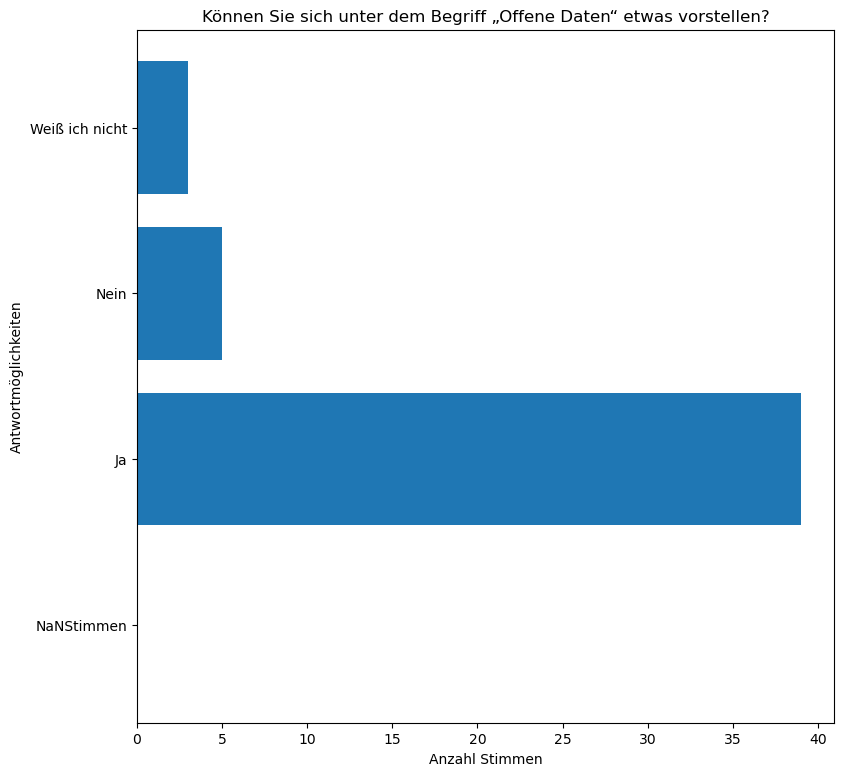

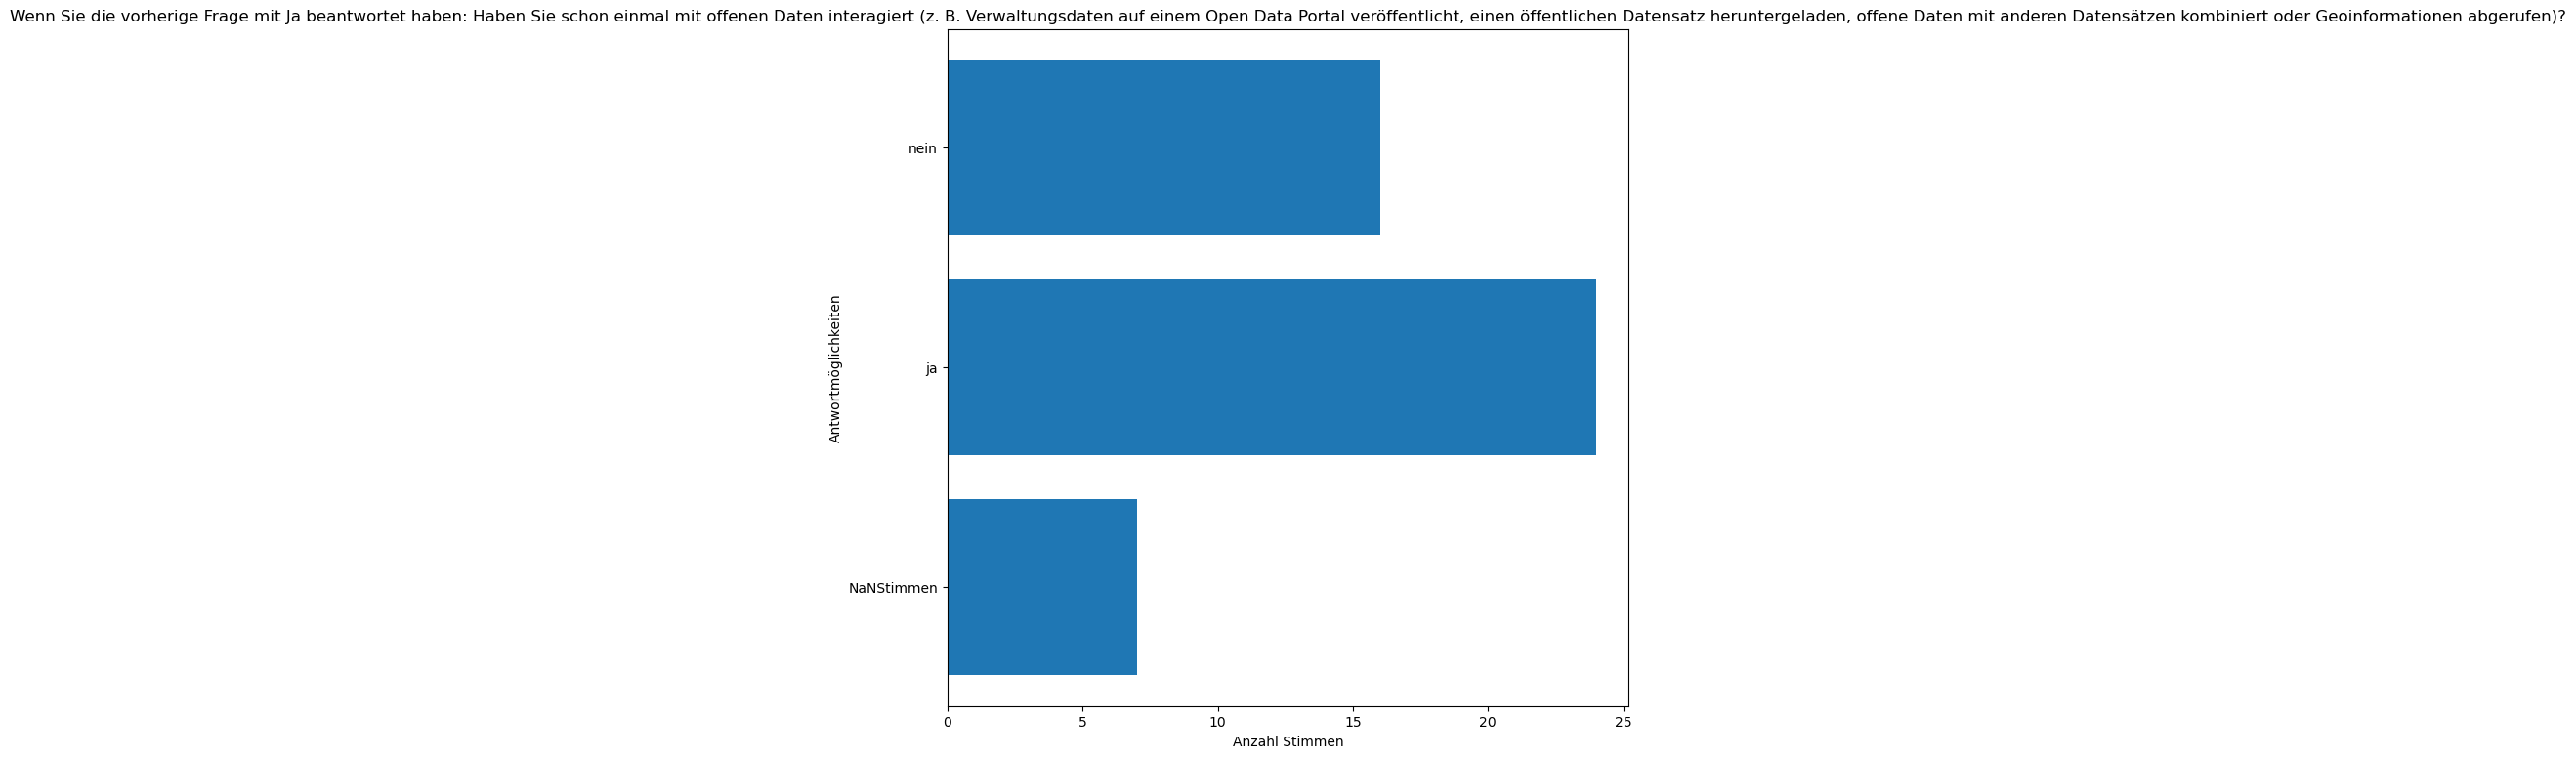

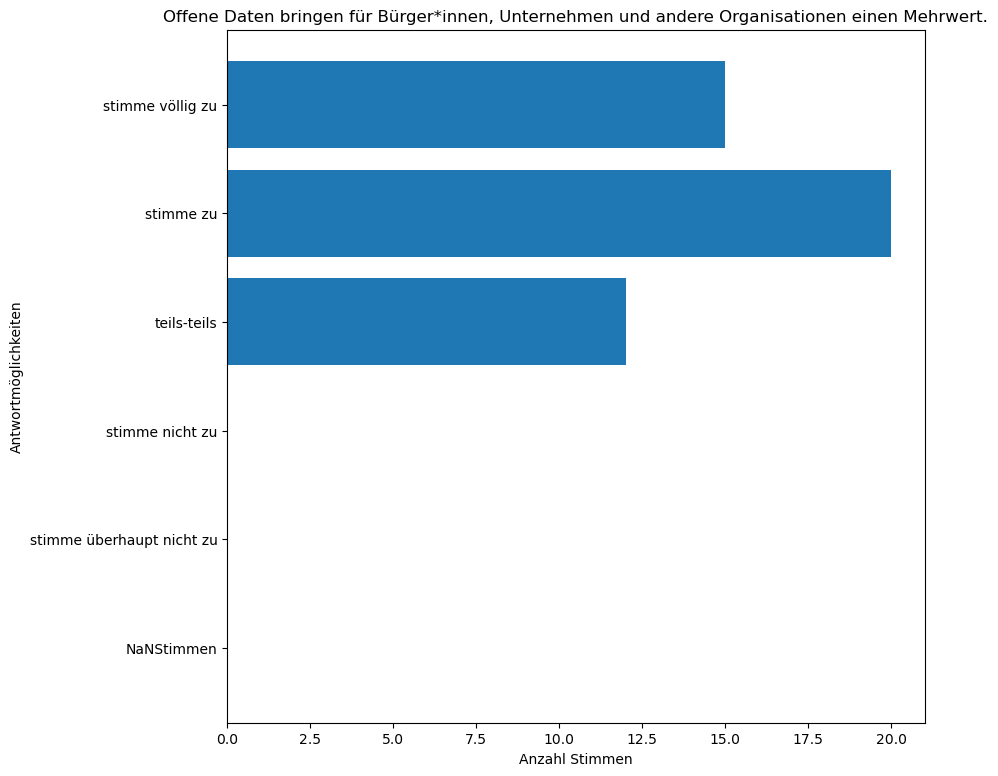

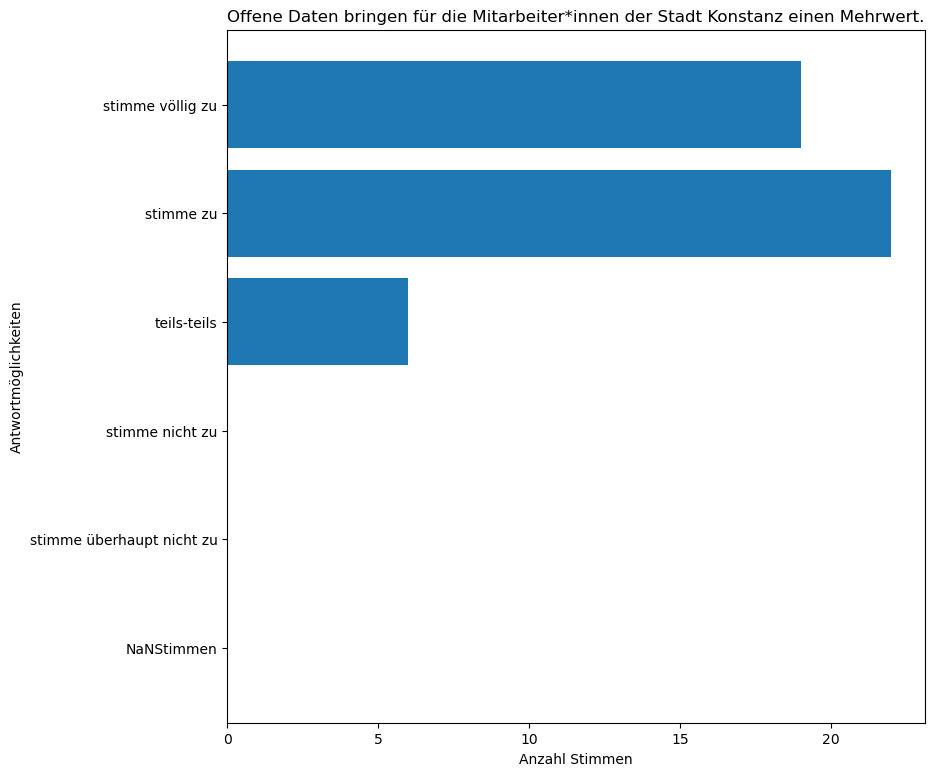

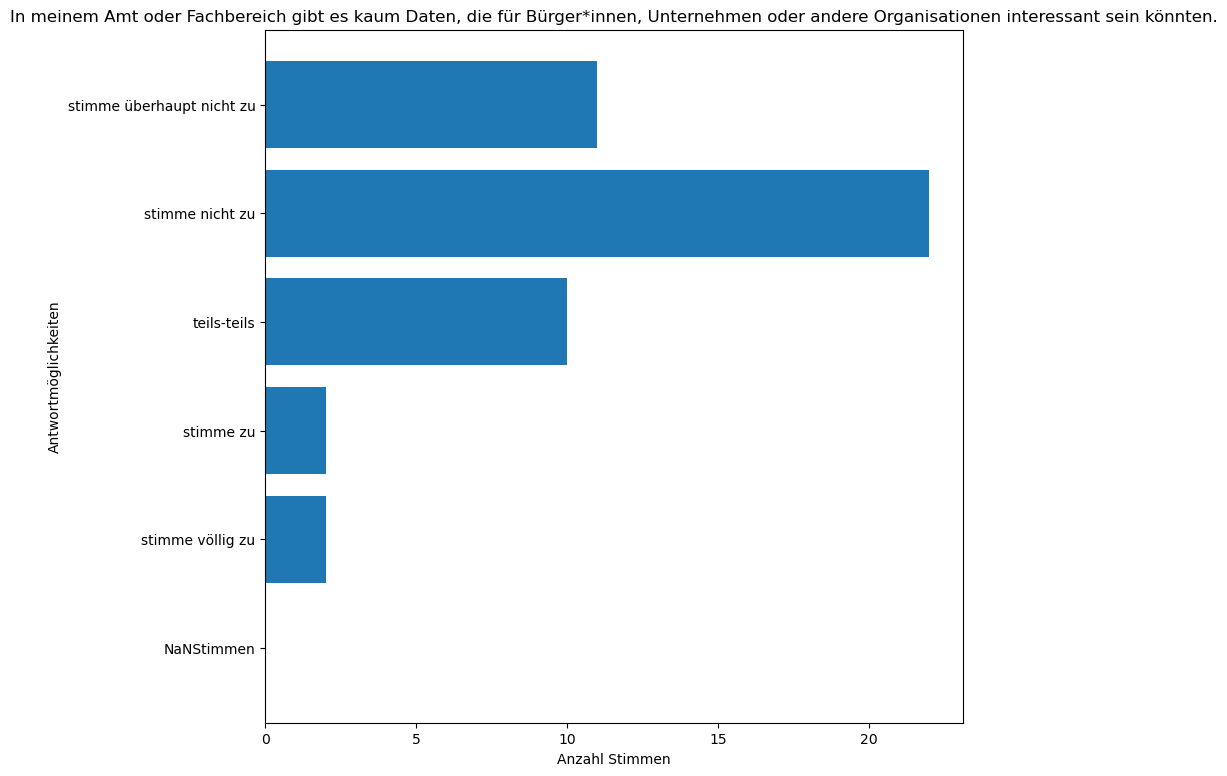

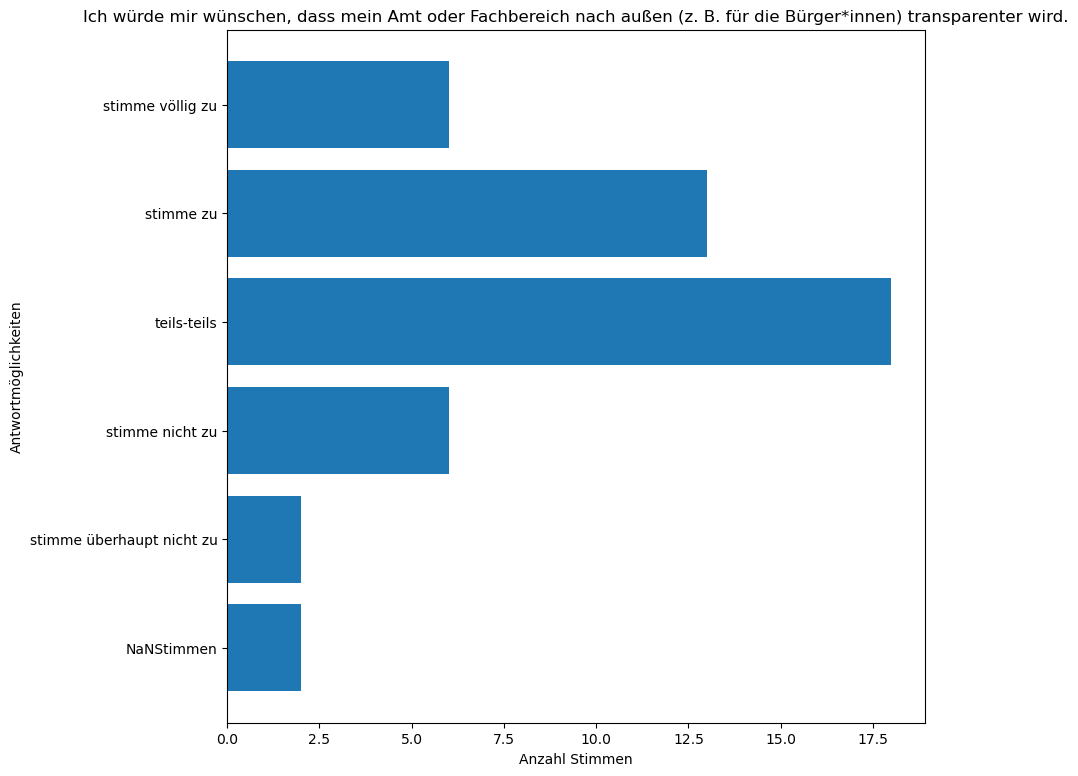

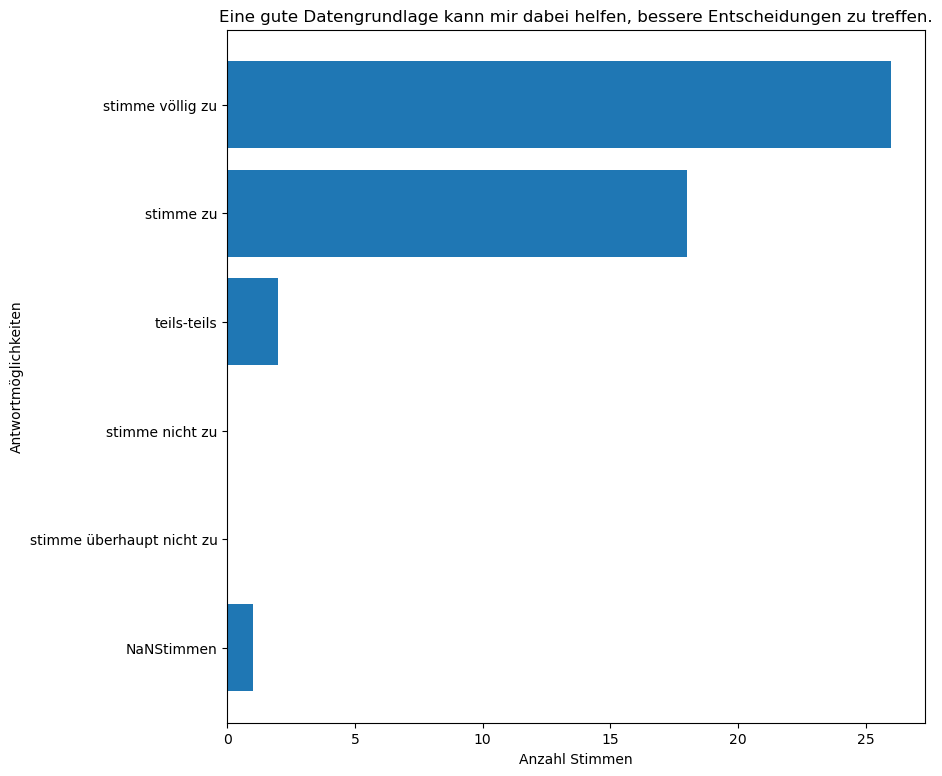

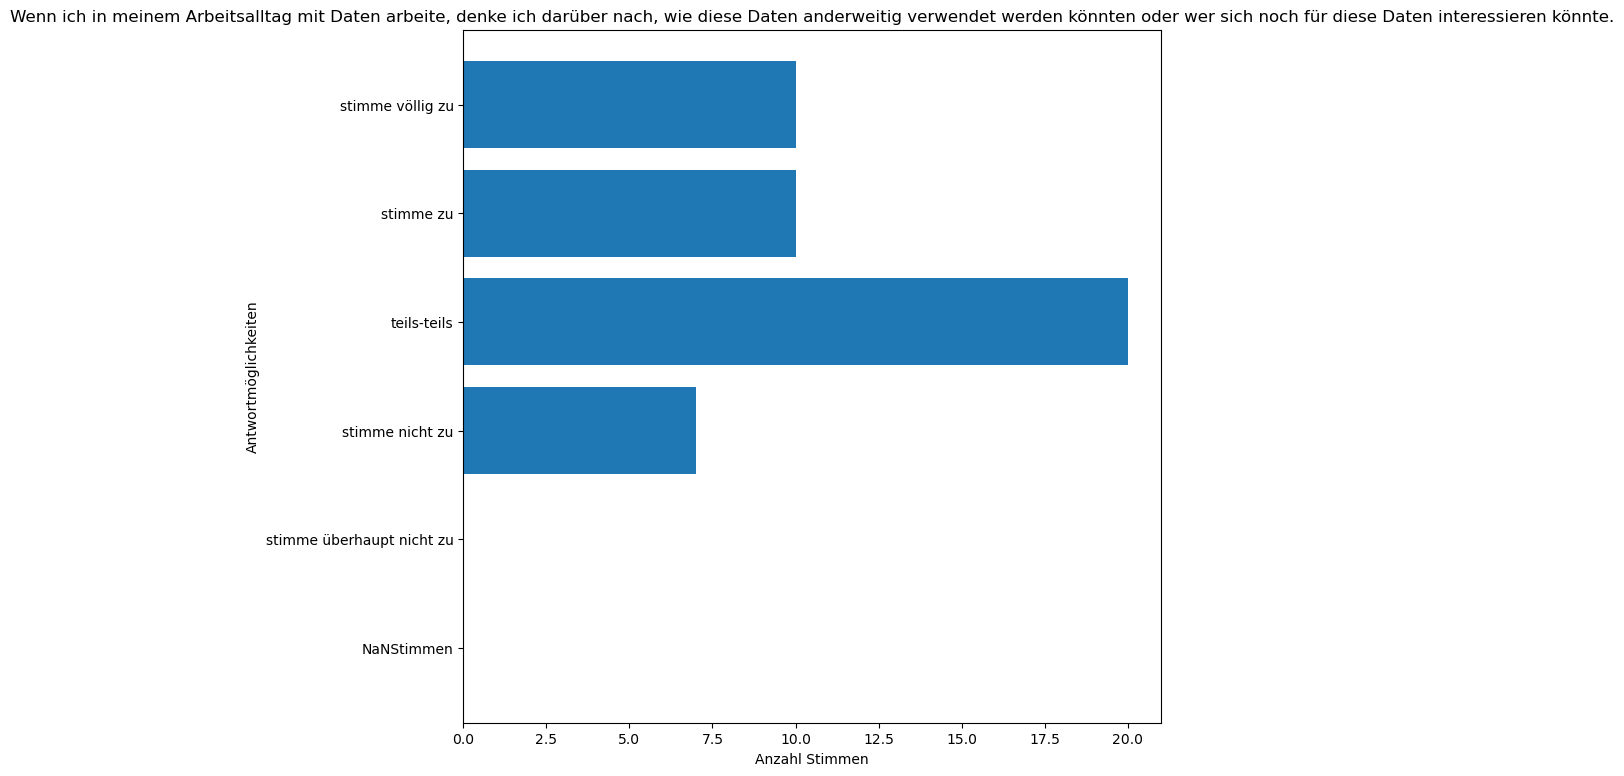

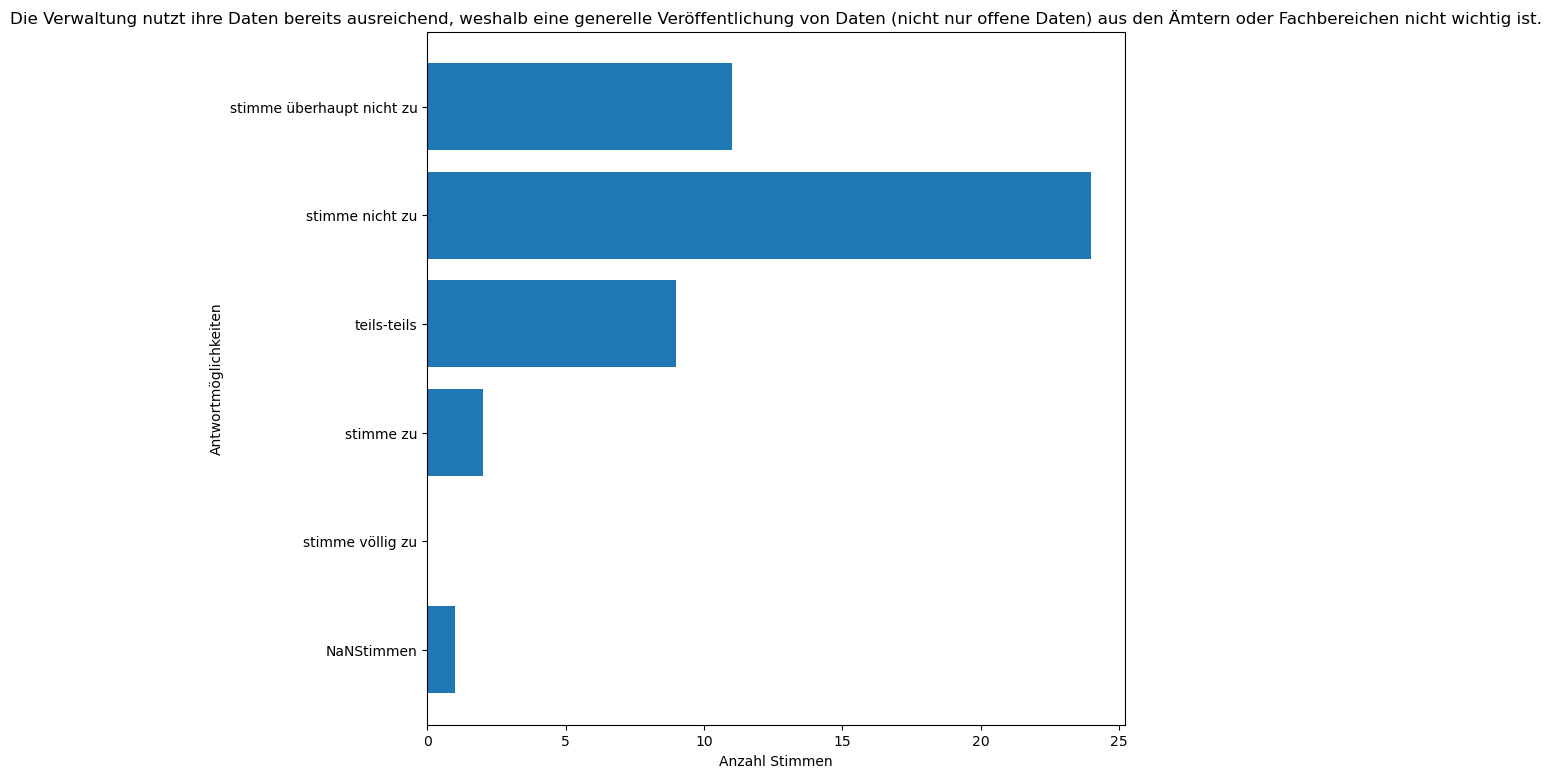

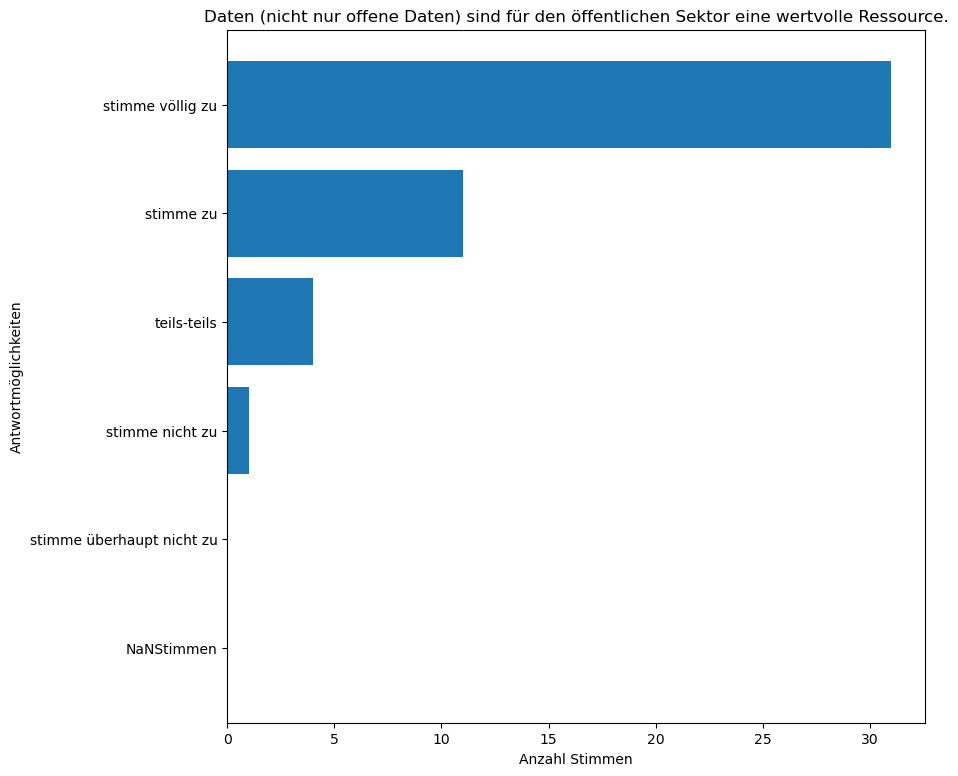

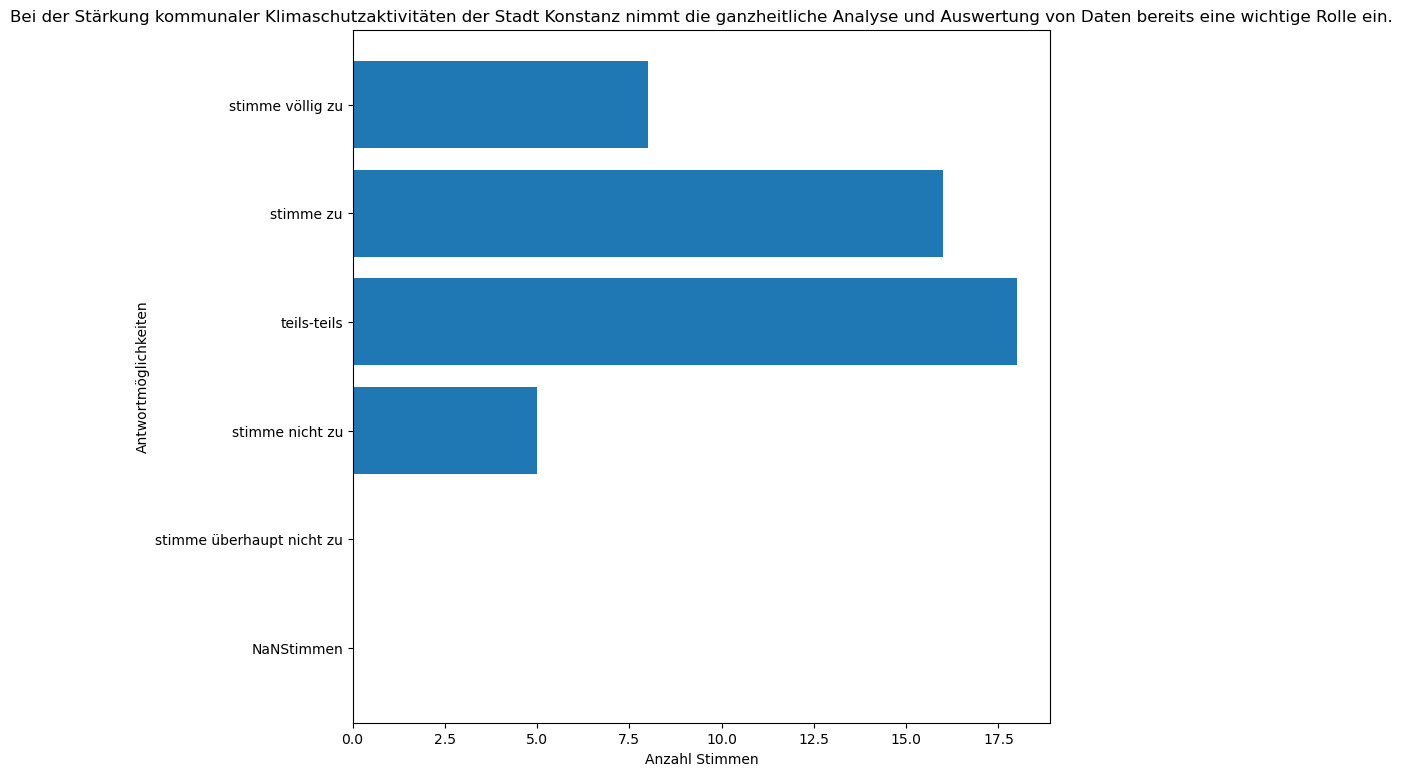

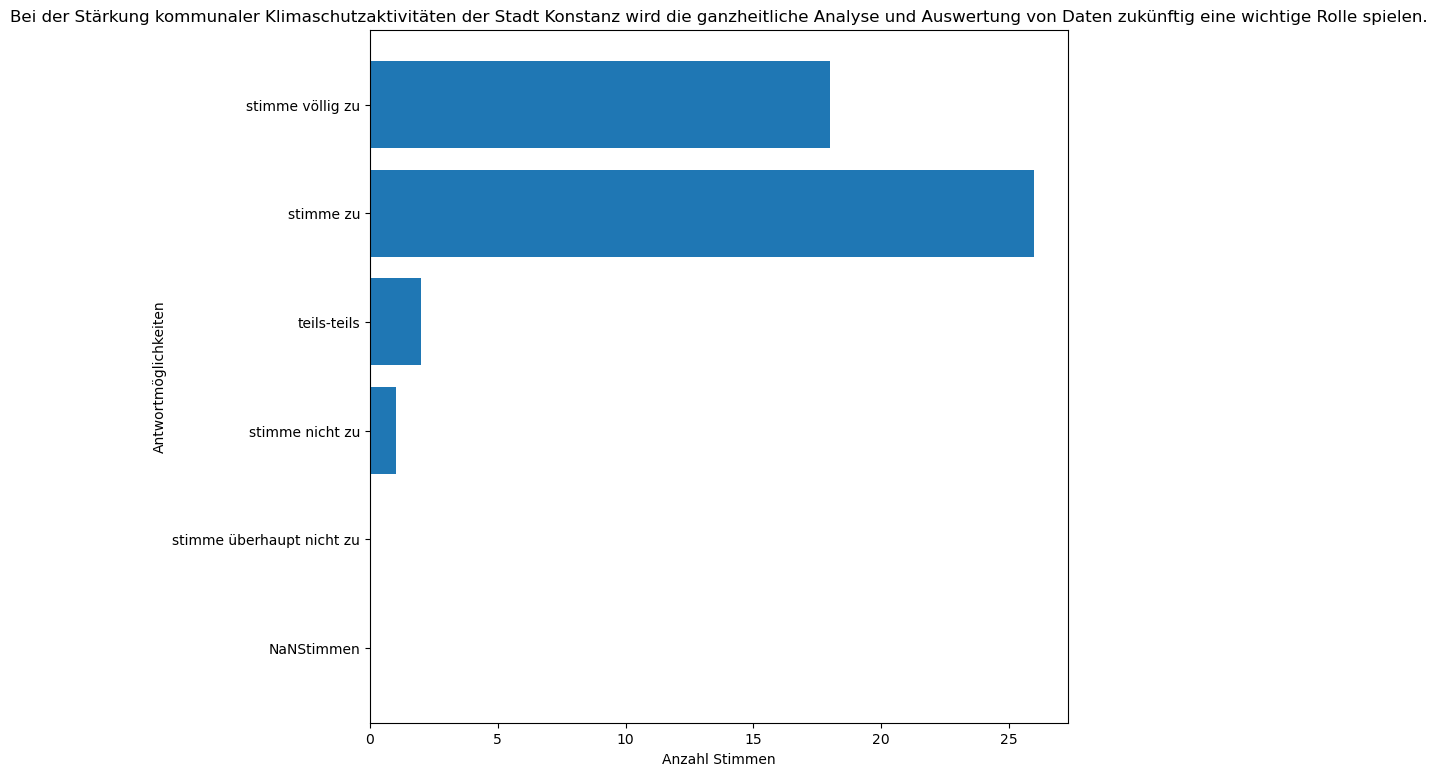

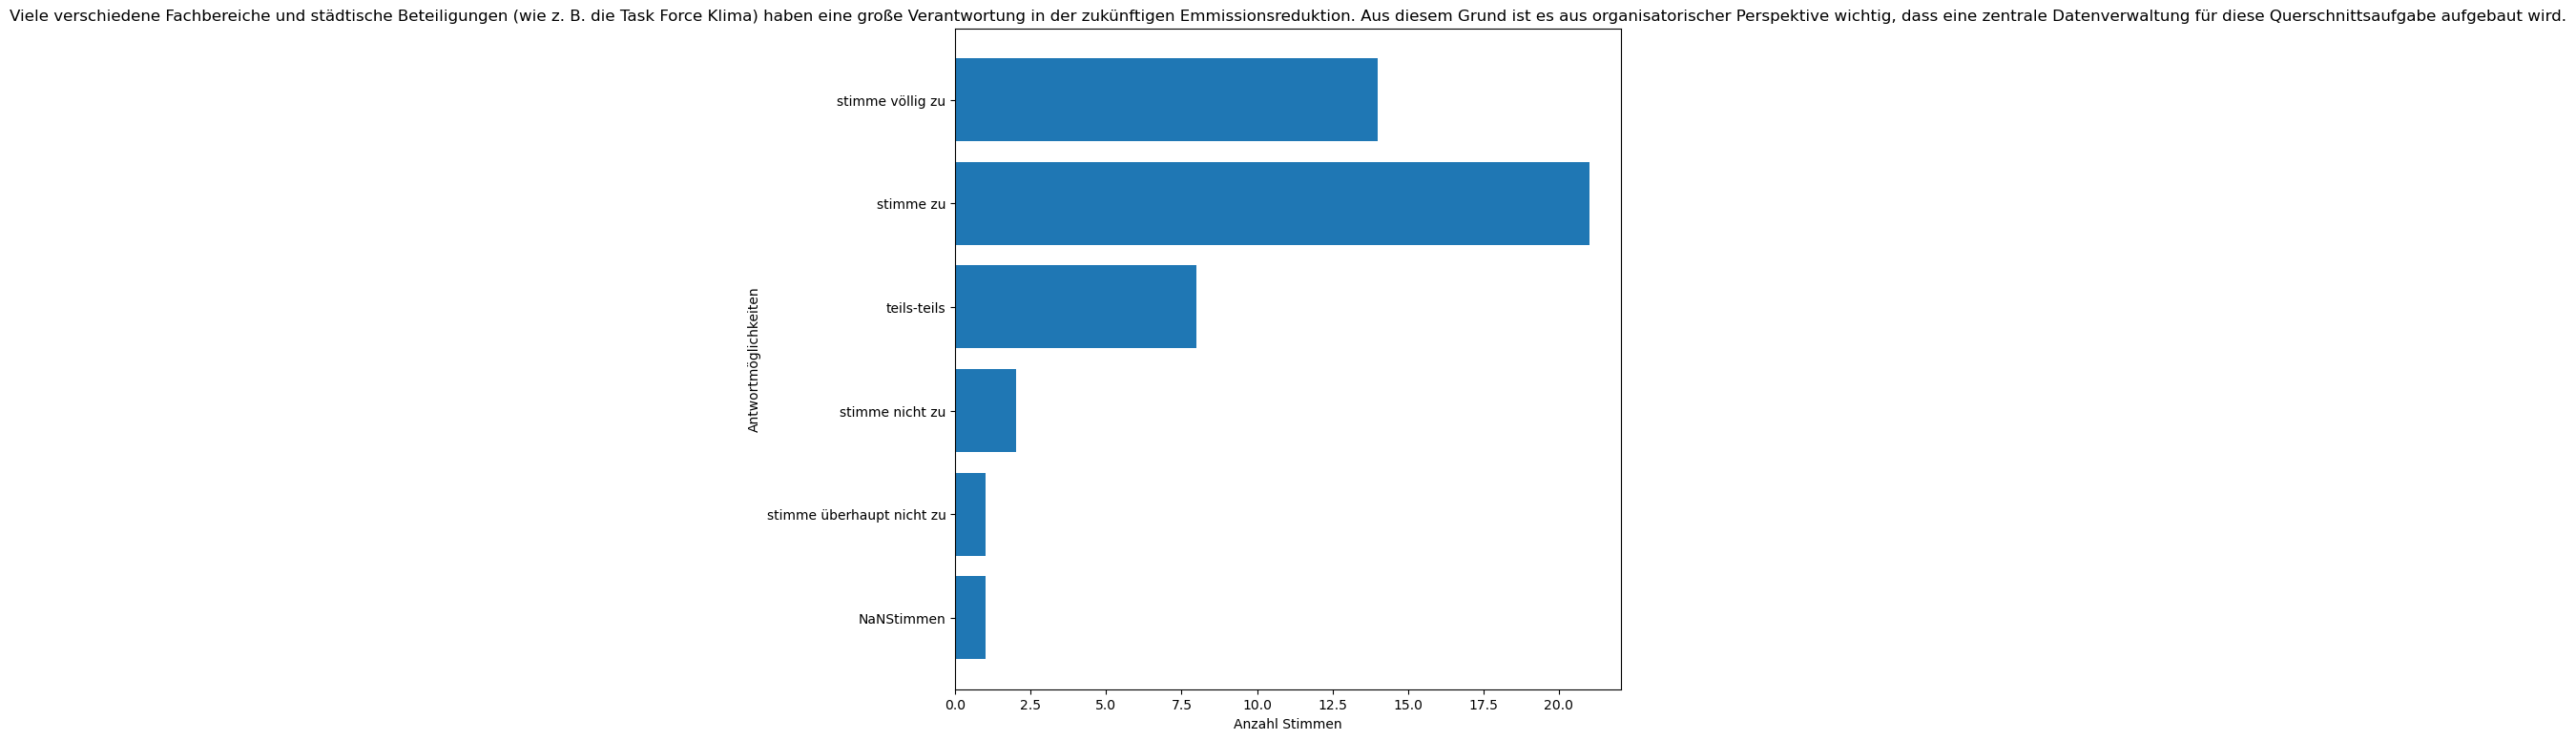

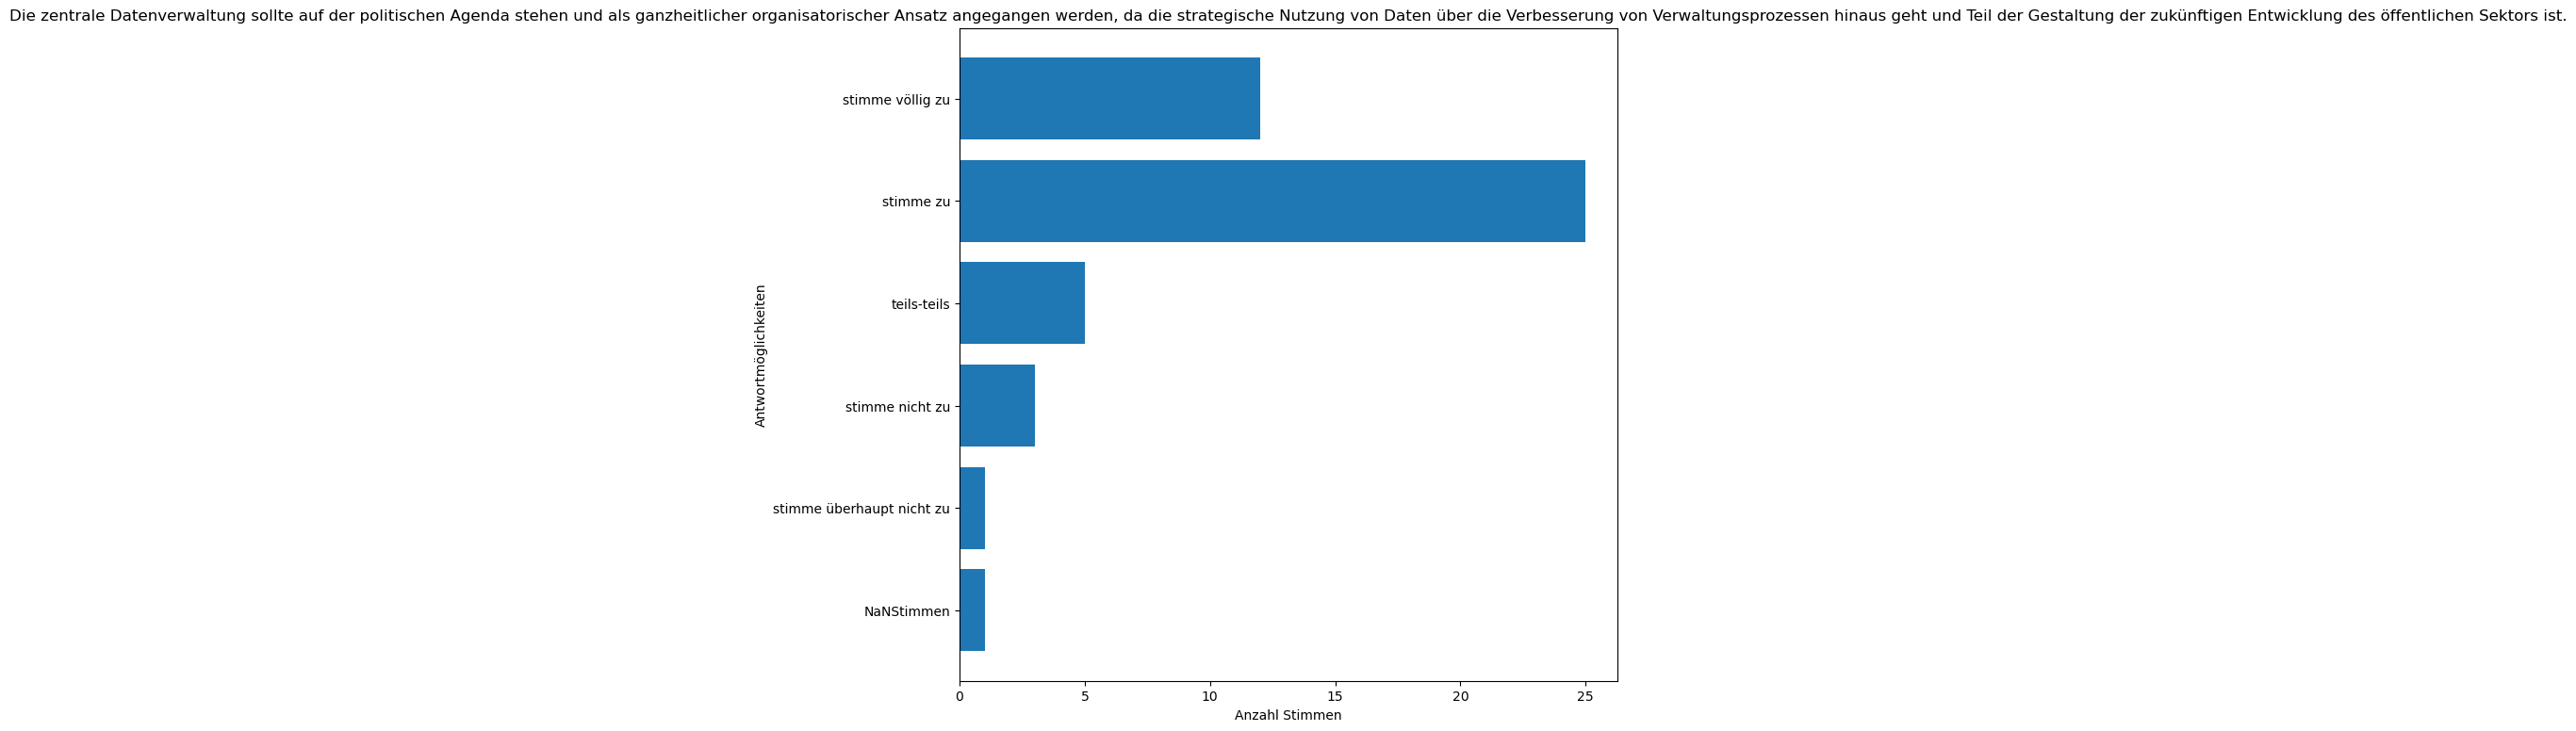

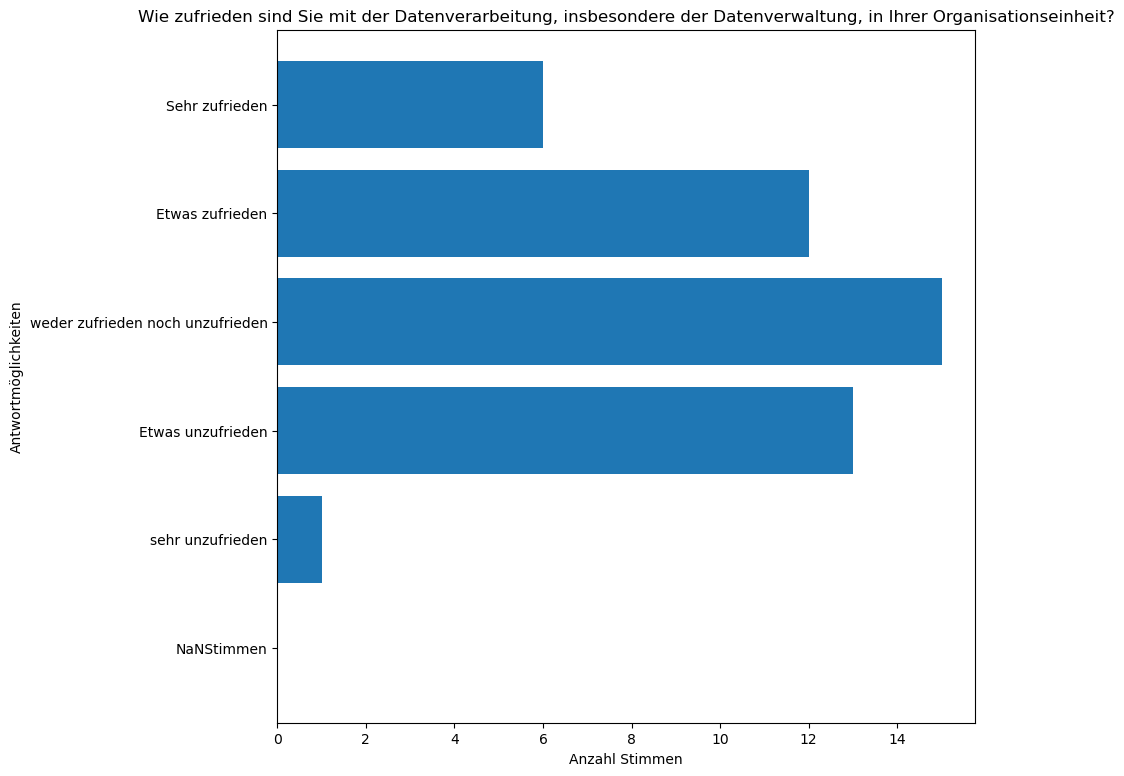

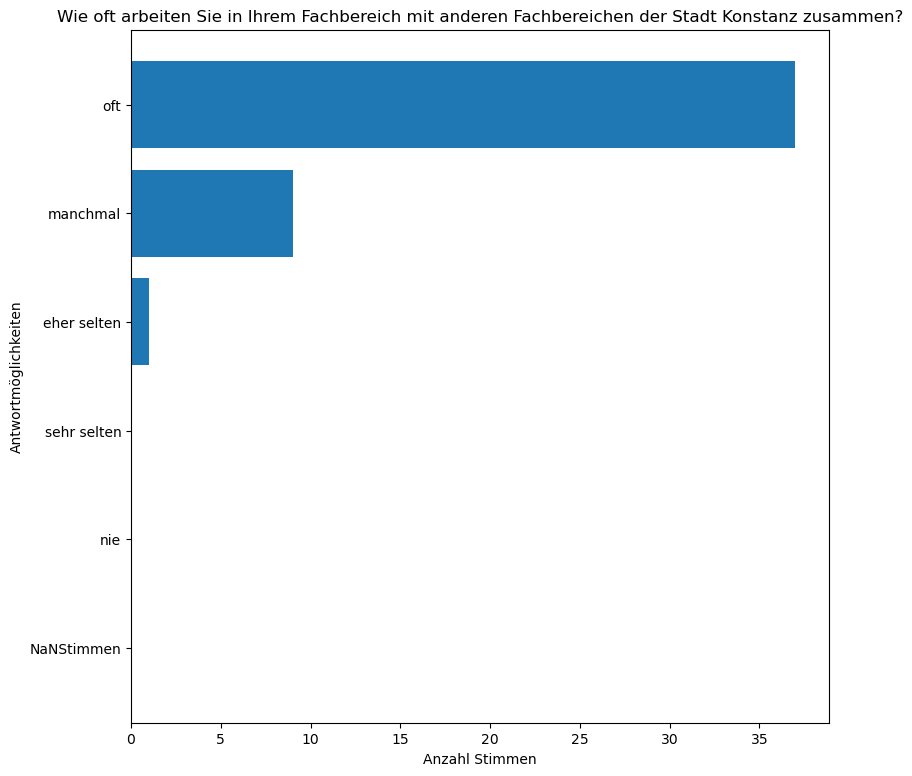

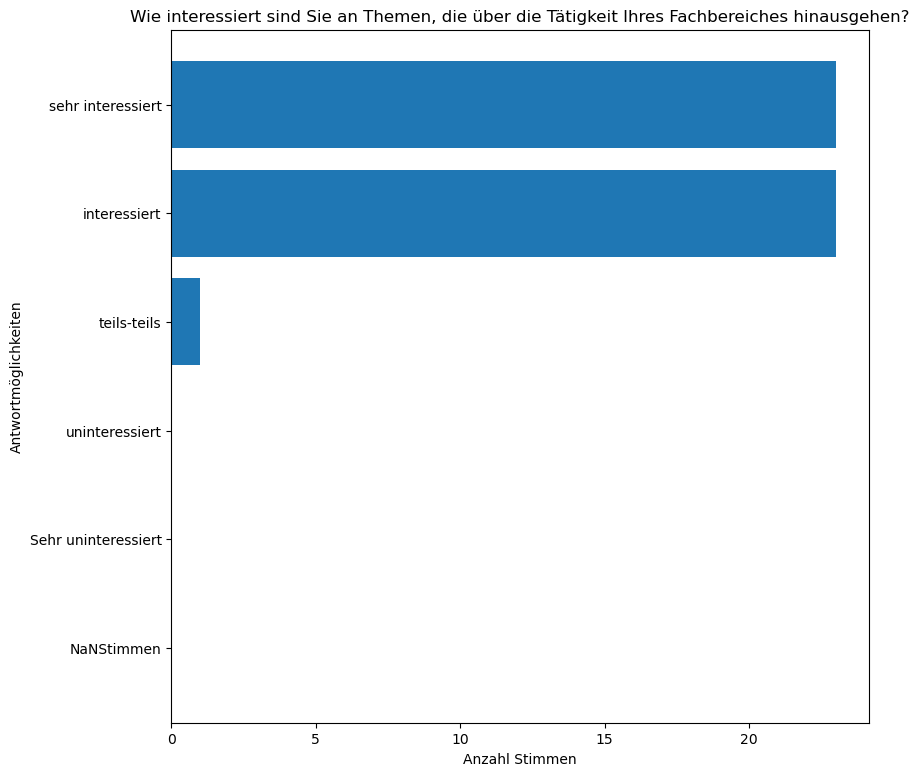

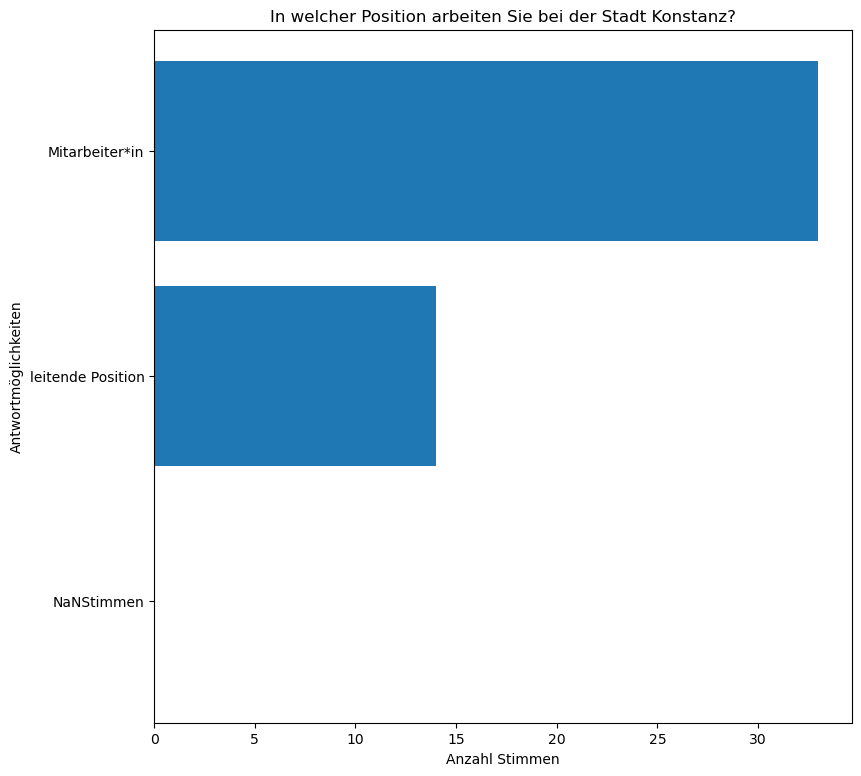

In [117]:
###Antwortmöglichkeiten
DB1=DB2=DB4=DB5=DB6=DB8=KS1=KS2=KS3=DV1=antwortMöglichkeiten_NaN_1bis5= ("NaNStimmen","stimme überhaupt nicht zu","stimme nicht zu","teils-teils","stimme zu","stimme völlig zu")
KL1=Zsmarbeit=antwortMöglichkeiten_NaN_nie_oft=("NaNStimmen","nie","sehr selten","eher selten","manchmal","oft")
KL2=KL3a=antwortMöglichkeiten_NaN_ja_nein=("NaNStimmen","ja","nein")
KL3=antwortMöglichkeiten_NaN_idk=("NaNStimmen","Ja","Nein","Weiß ich nicht")
DB3=DB7=stimmenReversed=["NaNStimmen","stimme völlig zu","stimme zu","teils-teils","stimme nicht zu","stimme überhaupt nicht zu"]
DV2=antwortMöglichkeiten_NaN_zufrieden=("NaNStimmen","sehr unzufrieden","Etwas unzufrieden","weder zufrieden noch unzufrieden","Etwas zufrieden","Sehr zufrieden")
Interesse =antwortMöglichkeiten_NaN_interessiert=("NaNStimmen","Sehr uninteressiert","uninteressiert","teils-teils","interessiert","sehr interessiert")
Position =antwortMöglichkeiten_NaN_position=("NaNStimmen","leitende Position","Mitarbeiter*in")



#######################################Fragen


frageKL1="Wie oft nutzen Sie in Ihrem täglichen Arbeitsgebiet Daten als Planungsgrundlage, um bessere Entscheidungen zu treffen?"
frageKL2="Kennen Sie das Offene Daten Portal (eine Website) der Stadt Konstanz?"
frageKL3="Können Sie sich unter dem Begriff „Offene Daten“ etwas vorstellen?"
frageKL3a="Wenn Sie die vorherige Frage mit Ja beantwortet haben: Haben Sie schon einmal mit offenen Daten interagiert (z. B. Verwaltungsdaten auf einem Open Data Portal veröffentlicht, einen öffentlichen Datensatz heruntergeladen, offene Daten mit anderen Datensätzen kombiniert oder Geoinformationen abgerufen)?"

frageDB1 ="Offene Daten bringen für Bürger*innen, Unternehmen und andere Organisationen einen Mehrwert."
frageDB2 ="Offene Daten bringen für die Mitarbeiter*innen der Stadt Konstanz einen Mehrwert."
frageDB3="In meinem Amt oder Fachbereich gibt es kaum Daten, die für Bürger*innen, Unternehmen oder andere Organisationen interessant sein könnten."
frageDB4 ="Ich würde mir wünschen, dass mein Amt oder Fachbereich nach außen (z. B. für die Bürger*innen) transparenter wird."
frageDB5 ="Eine gute Datengrundlage kann mir dabei helfen, bessere Entscheidungen zu treffen."
frageDB6="Wenn ich in meinem Arbeitsalltag mit Daten arbeite, denke ich darüber nach, wie diese Daten anderweitig verwendet werden könnten oder wer sich noch für diese Daten interessieren könnte."
frageDB7="Die Verwaltung nutzt ihre Daten bereits ausreichend, weshalb eine generelle Veröffentlichung von Daten (nicht nur offene Daten) aus den Ämtern oder Fachbereichen nicht wichtig ist."
frageDB8="Daten (nicht nur offene Daten) sind für den öffentlichen Sektor eine wertvolle Ressource."


frageKS1='Bei der Stärkung kommunaler Klimaschutzaktivitäten der Stadt Konstanz nimmt die ganzheitliche Analyse und Auswertung von Daten bereits eine wichtige Rolle ein.'
frageKS2='Bei der Stärkung kommunaler Klimaschutzaktivitäten der Stadt Konstanz wird die ganzheitliche Analyse und Auswertung von Daten zukünftig eine wichtige Rolle spielen.'
frageKS3='Viele verschiedene Fachbereiche und städtische Beteiligungen (wie z. B. die Task Force Klima) haben eine große Verantwortung in der zukünftigen Emmissionsreduktion. Aus diesem Grund ist es aus organisatorischer Perspektive wichtig, dass eine zentrale Datenverwaltung für diese Querschnittsaufgabe aufgebaut wird.'

frageDV1 ="Die zentrale Datenverwaltung sollte auf der politischen Agenda stehen und als ganzheitlicher organisatorischer Ansatz angegangen werden, da die strategische Nutzung von Daten über die Verbesserung von Verwaltungsprozessen hinaus geht und Teil der Gestaltung der zukünftigen Entwicklung des öffentlichen Sektors ist."
frageDV2 ="Wie zufrieden sind Sie mit der Datenverarbeitung, insbesondere der Datenverwaltung, in Ihrer Organisationseinheit?"

frageZsmarbeit ="Wie oft arbeiten Sie in Ihrem Fachbereich mit anderen Fachbereichen der Stadt Konstanz zusammen?"
frageInteresse ="Wie interessiert sind Sie an Themen, die über die Tätigkeit Ihres Fachbereiches hinausgehen?"
fragePosition ="In welcher Position arbeiten Sie bei der Stadt Konstanz?"


plot(dfUmfrage.KL1,KL1,frageKL1,'KL1')
plot(dfUmfrage.KL2,KL2,frageKL2,'KL2')
plot(dfUmfrage.KL3,KL3,frageKL3,'KL3')
plot(dfUmfrage.KL3a,KL3a,frageKL3a,'KL3a')

plot(dfUmfrage.DB1,DB1,frageDB1,'DB1')
plot(dfUmfrage.DB2,DB2,frageDB2,'DB2')
plot(dfUmfrage["DB3*"],DB3,frageDB3,'DB3')
plot(dfUmfrage.DB4,DB4,frageDB4,'DB4')
plot(dfUmfrage.DB5,DB5,frageDB5,'DB5')
plot(dfUmfrage.DB6,DB6,frageDB6,'DB6')
plot(dfUmfrage['DB7*'],DB7,frageDB7,'DB7')
plot(dfUmfrage['DB8'],DB8,frageDB8,'DB8')


plot(dfUmfrage.KS1,KS1,frageKS1,'KS1')
plot(dfUmfrage.KS2,KS2,frageKS2,'KS2')
plot(dfUmfrage.KS3,KS3,frageKS3,'KS3')

plot(dfUmfrage.DV1,DV1,frageDV1,'DV1')
plot(dfUmfrage.DV2,DV2,frageDV2,'DV2')

plot(dfUmfrage.Zsmarbeit,Zsmarbeit,frageZsmarbeit,'Zsmarbeit')
plot(dfUmfrage.Interesse,Interesse,frageInteresse,'Interesse')
plot(dfUmfrage.Position,Position,fragePosition,'Position')













---------------

```String to DateTime converter:```

In [118]:
import dateutil.parser as parser
import datetime
dfWetter=pd.read_csv('../data/Zaehlstelle_Herose_2021_15min.csv',error_bad_lines=False,sep=",")

#format='%d%m%Y'
#print(dfWetter['Time'].split())

#dfWetter['Time'] = pd.to_datetime(dfWetter['Time'])
#print(dfWetter['Time'] [0])

date_time = parser.parse(dfWetter['Time'][1000] )
#print(type(date_time))
date_time=date_time.date()
print(date_time)

#for count,value in enumerate(dfWetter["Time"]):
    #dfWetter["Time"][count]=parser.parse(dfWetter["Time"][count]).date()

print(dfWetter.Time[0])
print(type(dfWetter.Time[3000]))


#temp=parser.parse(dfWetter.Time[3000])
#temp =dfWetter.Time[3000]
#temp=datetime.datetime.strptime(temp, "%d %m %Y").date()
#print(temp)

dfWetter.Time[1]




2021-01-11
1. Jan. 2021 00:00
<class 'str'>


/tmp/ipykernel_12576/662797012.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfWetter=pd.read_csv('../data/Zaehlstelle_Herose_2021_15min.csv',error_bad_lines=False,sep=",")


'1. Jan. 2021 00:15'

In [119]:
temp =dfWetter.Time[3000].replace('.', ' ')
temp

print(type(dfWetter.Time))

list=[val for count,val in enumerate(dfWetter.Time)]
for i in list:
    list[i]=list[i].replace(".", "")

print(list[0])
list[0]=list[0].replace(".","")
print(list[0])





<class 'pandas.core.series.Series'>


TypeError: list indices must be integers or slices, not str